In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [19]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

sys.path.append("../Lib")
from neuralnetwork import classifier
from imbalanced import balance_score,upsample,undersample

In [3]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

# Data

In [4]:
data_all=np.load('..\Data\data_ct_death_np.npy')

In [5]:
np.random.shuffle(data_all)
features_all=data_all[:,0:-1]
label_all=(data_all[:,-1]>0).astype(int)

In [6]:
label_all.shape

(8878,)

In [7]:
num_sample=data_all.shape[0]
num_sample

8878

In [8]:
num_feature=data_all.shape[1]-1
num_feature

11

In [9]:
num_train=int(num_sample*0.8)
num_train

7102

In [10]:
num_test=num_sample-num_train
num_test

1776

In [11]:
train_X=features_all[0:num_train,:]
train_y=label_all[0:num_train]
test_X=features_all[num_train:,:]
test_y=label_all[num_train:]

## NN

In [12]:
death_predicter=classifier(dim=num_feature)

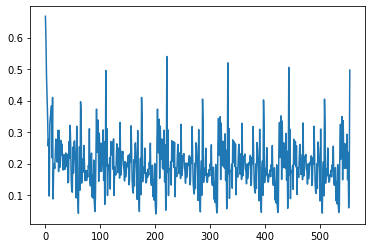

In [13]:
losses=death_predicter.train(train_X,train_y,lr=1e-2,iter=500)
plt.plot(losses)

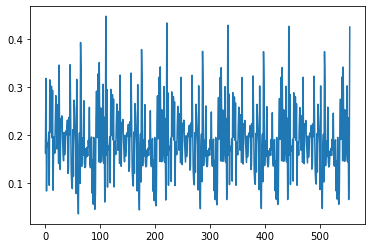

In [14]:
losses=death_predicter.train(train_X,train_y,lr=1e-4,iter=500)
plt.plot(losses)

In [15]:
result_test=death_predicter.predict(test_X)

In [18]:
balance_score(result_test,test_y)

0.5

## LR

In [20]:
clf = LogisticRegression(random_state=0).fit(train_X, train_y)

In [21]:
result_test=clf.predict(test_X)

In [22]:
balance_score(result_test,test_y)

0.504950495049505

## Oversampling

In [23]:
train_X1,train_y1=upsample(train_X,train_y)

### Oversampling + NN

In [24]:
death_predicter1=classifier(dim=num_feature)

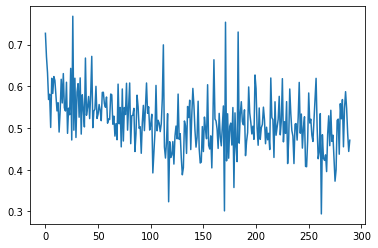

In [25]:
losses=death_predicter1.train(train_X1,train_y1,iter=200,lr=1e-2)
plt.plot(losses)

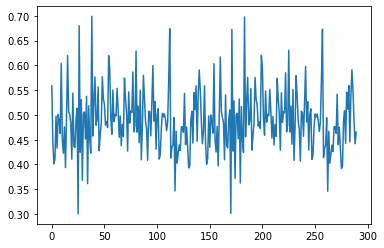

In [26]:
losses=death_predicter1.train(train_X1,train_y1,iter=200,lr=1e-4)
plt.plot(losses)

In [27]:
result_test=death_predicter1.predict(test_X)

In [28]:
balance_score(result_test,test_y)

0.675557854292892

### Oversampling + LR

In [29]:
clf = LogisticRegression(random_state=0)
clf.fit(train_X1, train_y1)

LogisticRegression(random_state=0)

In [30]:
result_test=clf.predict(test_X)

In [31]:
balance_score(result_test,test_y)

0.6483168316831683

## Undersampling

In [ ]:
train_X1,train_y1=undersample(train_X,train_y)

### Undersampling + NN

In [24]:
death_predicter1=classifier(dim=num_feature)

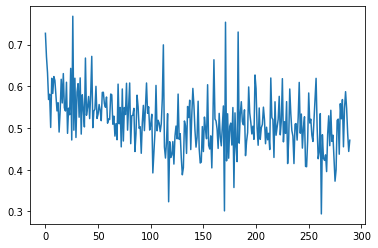

In [25]:
losses=death_predicter1.train(train_X1,train_y1,iter=200,lr=1e-2)
plt.plot(losses)

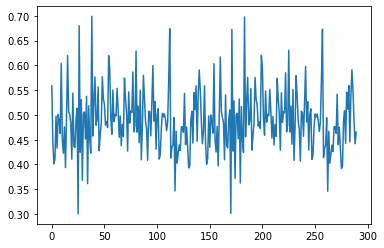

In [26]:
losses=death_predicter1.train(train_X1,train_y1,iter=200,lr=1e-4)
plt.plot(losses)

In [27]:
result_test=death_predicter1.predict(test_X)

In [28]:
balance_score(result_test,test_y)

0.675557854292892

### Undersampling + LR

In [29]:
clf = LogisticRegression(random_state=0)
clf.fit(train_X1, train_y1)

LogisticRegression(random_state=0)

In [30]:
result_test=clf.predict(test_X)

In [31]:
balance_score(result_test,test_y)

0.6483168316831683

## Focal Loss

In [32]:
death_predicter2=classifier(dim=num_feature)

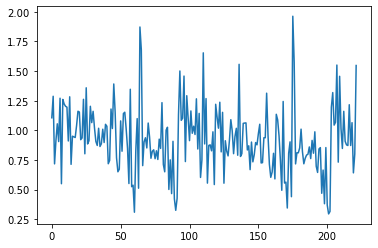

In [33]:
losses=death_predicter2.train(train_X,train_y,iter=200,lr=1e-2,loss=1)
plt.plot(losses)

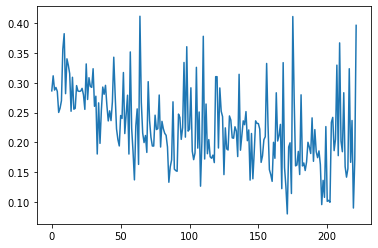

In [34]:
losses=death_predicter1.train(train_X,train_y,iter=200,lr=1e-4)
plt.plot(losses)

In [35]:
result_test=death_predicter2.predict(test_X)

In [36]:
balance_score(result_test,test_y)

0.6754337224767253